<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Reading-data-scrapped-in-previous-notebook" data-toc-modified-id="Reading-data-scrapped-in-previous-notebook-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Reading data scrapped in previous notebook</a></span><ul class="toc-item"><li><span><a href="#Removing-odd-cases-of-properties-outside-of-Warsaw" data-toc-modified-id="Removing-odd-cases-of-properties-outside-of-Warsaw-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Removing odd cases of properties outside of Warsaw</a></span></li></ul></li><li><span><a href="#Basic-data-visualization" data-toc-modified-id="Basic-data-visualization-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Basic data visualization</a></span><ul class="toc-item"><li><span><a href="#Visualizing-unit-price-(PLN/m2)-for-each-offer-as-scatter-plot" data-toc-modified-id="Visualizing-unit-price-(PLN/m2)-for-each-offer-as-scatter-plot-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Visualizing unit price (PLN/m2) for each offer as scatter plot</a></span></li><li><span><a href="#Grouping-offers-to-create-a-grid" data-toc-modified-id="Grouping-offers-to-create-a-grid-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Grouping offers to create a grid</a></span></li></ul></li><li><span><a href="#Choroplet-maps" data-toc-modified-id="Choroplet-maps-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Choroplet maps</a></span><ul class="toc-item"><li><span><a href="#Initial-approach-to-grid-based-choropleth-map" data-toc-modified-id="Initial-approach-to-grid-based-choropleth-map-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Initial approach to grid based choropleth map</a></span></li><li><span><a href="#Countour-plot-with-geojson" data-toc-modified-id="Countour-plot-with-geojson-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Countour plot with geojson</a></span></li><li><span><a href="#Could-we-make-contour-plot-look-better-with-interpolation-of-point?" data-toc-modified-id="Could-we-make-contour-plot-look-better-with-interpolation-of-point?-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Could we make contour plot look better with interpolation of point?</a></span><ul class="toc-item"><li><span><a href="#Real-Estate-unit-prices-countour-map-(PLN/m2)" data-toc-modified-id="Real-Estate-unit-prices-countour-map-(PLN/m2)-3.3.1"><span class="toc-item-num">3.3.1&nbsp;&nbsp;</span>Real Estate unit prices countour map (PLN/m2)</a></span></li></ul></li><li><span><a href="#Clustering-similar-properties-into-irregular-areas" data-toc-modified-id="Clustering-similar-properties-into-irregular-areas-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Clustering similar properties into irregular areas</a></span></li></ul></li><li><span><a href="#Scraping-geo-data-using-Google-Api" data-toc-modified-id="Scraping-geo-data-using-Google-Api-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Scraping geo data using Google Api</a></span><ul class="toc-item"><li><span><a href="#How-long-would-it-take-to-drive-from-a-tile-to-cetral-point-of-Warsaw" data-toc-modified-id="How-long-would-it-take-to-drive-from-a-tile-to-cetral-point-of-Warsaw-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>How long would it take to drive from a tile to cetral point of Warsaw</a></span></li><li><span><a href="#Mapping-drivetime" data-toc-modified-id="Mapping-drivetime-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Mapping drivetime</a></span><ul class="toc-item"><li><span><a href="#Public-transport-commute-time-to-center---Monday-8AM" data-toc-modified-id="Public-transport-commute-time-to-center---Monday-8AM-4.2.1"><span class="toc-item-num">4.2.1&nbsp;&nbsp;</span>Public transport commute time to center - Monday 8AM</a></span></li><li><span><a href="#How-much-does-the-price-decrease-from-20k-per-m2-(max)-for-every-additional-10-mins-of-commute-to-center" data-toc-modified-id="How-much-does-the-price-decrease-from-20k-per-m2-(max)-for-every-additional-10-mins-of-commute-to-center-4.2.2"><span class="toc-item-num">4.2.2&nbsp;&nbsp;</span>How much does the price decrease from 20k per m2 (max) for every additional 10 mins of commute to center</a></span></li></ul></li></ul></li></ul></div>

In [1]:
import os
from urllib.request import urlretrieve
from urllib.request import urlopen
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import re
import json
import numpy as np
import timeit 
from datetime import datetime

In [2]:
import plotly.express as px
from shapely.geometry import Polygon, MultiPolygon
import geopandas as gpd

In [3]:
# Cufflinks wrapper on plotly
import cufflinks
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

from plotly.offline import iplot
cufflinks.go_offline()

# Set global theme

import plotly.figure_factory as ff

import plotly.graph_objects as go

# Reading data scrapped in previous notebook

In [4]:
df=pd.read_excel("Warsaw_RE_data.xlsx")

In [5]:
df.columns

Index(['Unnamed: 0', 'Id', 'Area', 'Price', 'latitude', 'longitude',
       'build_year', 'building_floors_num', 'rooms_num', 'floors_num', 'City',
       'district', 'market', 'Building_material', 'Building_ownership',
       'Building_type', 'Construction_status', 'floor_no', 'Heating',
       'Windows_type', 'Equipment_types_dishwasher', 'Equipment_types_fridge',
       'Equipment_types_furniture', 'Equipment_types_oven',
       'Equipment_types_stove', 'Equipment_types_tv',
       'Equipment_types_washing_machine', 'Extras_types_air_conditioning',
       'Extras_types_attic', 'Extras_types_balcony', 'Extras_types_basement',
       'Extras_types_garage', 'Extras_types_garden', 'Extras_types_lift',
       'Extras_types_separate_kitchen', 'Extras_types_terrace',
       'Extras_types_two_storey', 'Extras_types_usable_room',
       'Media_types_cable-television', 'Media_types_electricity',
       'Media_types_internet', 'Media_types_phone', 'Media_types_sewage',
       'Media_types_wate

In [6]:
df.shape

(11939, 50)

## Removing odd cases of properties outside of Warsaw

In [7]:
df=df.query("City=='warszawa'")
df=df.query("latitude>52 and latitude<53")
df=df.query("longitude>20 and longitude<21.2")

In [8]:
df.shape

(11884, 50)

In [9]:
df.groupby("district", as_index=False).count()[["district","Id"]].sort_values(by="Id",ascending=False).head(10)

district    Id
115            Wola  1312
44          Mokotów  1185
126     Śródmieście   903
4         Białołęka   851
70   Praga-Południe   662
3            Bemowo   587
106           Ursus   498
107         Ursynów   425
112         Wilanów   425
120          Włochy   410

In [10]:
df["unit_price"]=df.Price/df.Area
df["unit_price"]=df.unit_price.apply(lambda x:int(x))

# Basic data visualization

In [11]:
data=[]
trace0=dict(
            lat=df.latitude,
            lon=df.longitude,
          
            type="scattermapbox",
            mode='markers',
            marker=dict(
                opacity=0.5, 
                size=10, 
                color=df.unit_price,
               
                colorscale="jet",
                cauto=False,
                cmax=20000,
                showscale=True),
                text=df.unit_price,
            
           
            )



data=[trace0]

layout = dict(
    
   
    
    title="Sample size by Production year and condition",
    height = 800,
    # top, bottom, left and right margins
    margin = dict(t = 0, b = 0, l = 0, r = 0),
    font = dict(color = '#FFFFFF', size = 11),
    paper_bgcolor = '#000000',
    mapbox = dict(
        
        # here you need the token from Mapbox
      
        # where we want the map to be centered
        center = dict(
            lat = 52.2,
            lon = 21
        ),
        # we want the map to be "parallel" to our screen, with no angle
        pitch = 0,
        # default level of zoom
        zoom = 10,
        # default map style
        style = "carto-positron"
    )

)

figure=dict(
    data=data,
    layout=layout,
  
    )


## Visualizing unit price (PLN/m2) for each offer as scatter plot

In [12]:
iplot(figure)

## Grouping offers to create a grid

In [13]:
rounding_num=0.015 #roundign coordinates by chosen precision creates a grid
df["lon_mod"]=np.round(df.longitude/rounding_num,0)*rounding_num
correction_coeff=0.5

df["lat_mod"]=np.round(df.latitude/(rounding_num*correction_coeff),0)*(rounding_num*correction_coeff)


In [14]:
data=[]
trace0=dict(
            lat=df.lat_mod,
            lon=df.lon_mod,
          
            type="scattermapbox",
            mode='markers',
            marker=dict(
                opacity=0.5, 
                size=10, 
                color=df.unit_price,
               
                colorscale="jet",
                cauto=False,
                cmax=20000,
                showscale=True),
                text=df.unit_price,
            
           
            )



data=[trace0]

layout = dict(
    
   
    
    title="Sample size by Production year and condition",
    height = 800,
    # top, bottom, left and right margins
    margin = dict(t = 0, b = 0, l = 0, r = 0),
    font = dict(color = '#FFFFFF', size = 11),
    paper_bgcolor = '#000000',
    mapbox = dict(
        
        # here you need the token from Mapbox
      
        # where we want the map to be centered
        center = dict(
            lat = 52.2,
            lon = 21
        ),
        # we want the map to be "parallel" to our screen, with no angle
        pitch = 0,
        # default level of zoom
        zoom = 10,
        # default map style
        style = "carto-positron"
    )

)

figure=dict(
    data=data,
    layout=layout
    )
iplot(figure)

# Choroplet maps

Scatter plots work well with maps, but they tend to be too crowded, on the other hand, the other surface plots are easier to read, but cannot be combined with a map using plotly. A choropleth map with custom created geojson object will probably be the best solution. 

In [51]:
df_map=df[["lat_mod","lon_mod","unit_price"]].groupby(["lat_mod","lon_mod"], as_index=False).mean()


In [52]:
df_map["sample"]=df[["lat_mod","lon_mod","Id"]].groupby(["lat_mod","lon_mod"], as_index=False).count().Id
df_map["district"]=df[["lat_mod","lon_mod","district"]].groupby(["lat_mod","lon_mod"], as_index=False).first().district

In [25]:
df_map["district"]=np.where(df_map.district.isna(),"Other",df_map.district)

In [26]:
df_map.head()

lat_mod  lon_mod  unit_price  sample district
0  52.0725   21.015      5842.0       1  Ursynów
1  52.0800   20.955     11484.0       2  Jelonki
2  52.0950   21.045      4887.0       1    Other
3  52.1025   20.985      5846.5       4     Pyry
4  52.1025   21.030      6912.0       3  Ursynów

In [27]:
df_map.shape

(410, 5)

In [28]:
df_map=df_map.query("sample>3")
df_map.reset_index(inplace=True)
df_map.drop(columns="index",inplace=True)

In [29]:
df_map.shape

(311, 5)

In [30]:
df_map["geo_Id"]=df_map.index

## Initial approach to grid based choropleth map

In [31]:
geo_list=[]

for i in range(0,df_map.shape[0]):
    point=df_map.iloc[i,:]
    geo_json={}
    geo_json["type"]="Feature"
    
    geo_json["properties"]={"District":point.district}
    
    geo_json["geometry"]={
        "type":"Polygon",
        "coordinates":[[[point.lon_mod+rounding_num/2,point.lat_mod+rounding_num*correction_coeff/2],
                        [point.lon_mod-rounding_num/2,point.lat_mod+rounding_num*correction_coeff/2],
                        [point.lon_mod-rounding_num/2,point.lat_mod-rounding_num*correction_coeff/2],
                        [point.lon_mod+rounding_num/2,point.lat_mod-rounding_num*correction_coeff/2]]]}
        
    geo_json["id"]=i
    
    geo_list.append(geo_json)


In [32]:
len(geo_list)

311

In [33]:
valid_geo_json=geo_list[0]

In [34]:
sub_districts={"type":"FeatureCollection","features":geo_list}

In [35]:

trace = go.Choroplethmapbox(
                            geojson=sub_districts,
                            locations=df_map.geo_Id,
                            z=df_map.unit_price,
                            colorscale="jet",  
                            marker_line_width=0,

                            marker=dict(opacity=0.5),

                           )
layout = dict(
    
   
    
    title="Sample size by Production year and condition",
    height = 800,
    # top, bottom, left and right margins
    margin = dict(t = 0, b = 0, l = 0, r = 0),
    font = dict(color = '#FFFFFF', size = 11),
    paper_bgcolor = '#000000',
    mapbox = dict(
        
        # here you need the token from Mapbox
      
        # where we want the map to be centered
        center = dict(
            lat = 52.2,
            lon = 21
        ),
        # we want the map to be "parallel" to our screen, with no angle
        pitch = 0,
        # default level of zoom
        zoom = 10,
        # default map style
        style = "carto-positron"
    )

)

figure=dict(
    data=[trace],
    layout=layout,
  
    )

iplot(figure)

## Countour plot with geojson

In [36]:
import matplotlib.pyplot as plt

In [37]:
z=df_piv.values
y=df_piv.index
x=df_piv.columns

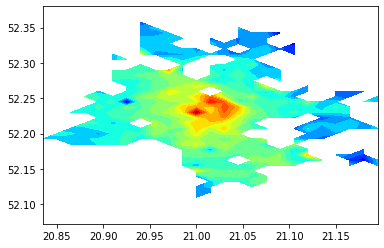

In [38]:
cs=plt.contourf(x,y,z,20,cmap="jet")

## Could we make contour plot look better with interpolation of point?

In [39]:
z=df_map.unit_price
y=df_map.lat_mod
x=df_map.lon_mod

In [40]:
from scipy.interpolate import griddata
from numpy import linspace

In [41]:
xi = linspace(x.min(),x.max(),100);
yi = linspace(y.min(),y.max(),100);
zi = griddata((x, y), z, (xi[None,:], yi[:,None]), method='cubic')

In [42]:
int(z.max())

21472

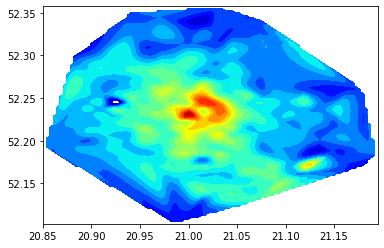

In [43]:
cs = plt.contourf(xi,yi,zi,range(4000,int(z.max())+1000,1000),cmap=plt.cm.jet)


In [44]:
import geojsoncontour

In [45]:
geojson = geojsoncontour.contourf_to_geojson(
    contourf=cs,
    ndigits=3,
   
)

json_dict=eval(geojson)

In [46]:
len(json_dict["features"])

18

In [47]:
arr_temp=np.ones([len(json_dict["features"]),2])

In [48]:
for i in range(0, len(json_dict["features"])):
    json_dict["features"][i]["id"]=i

    
    arr_temp[i,0]=i
    arr_temp[i,1]=float(json_dict["features"][i]["properties"]["title"])
    


In [49]:
df_contour=pd.DataFrame(arr_temp, columns=["Id","Price"])

In [50]:
trace = go.Choroplethmapbox(
                            geojson=json_dict,
                            locations=df_contour.Id,
                            z=df_contour.Price,
                            colorscale="jet",  
                            marker_line_width=0,

                            marker=dict(opacity=0.5)
                           )
layout = dict(
    
   
    
    title="Sample size by Production year and condition",
    height = 800,
    # top, bottom, left and right margins
    margin = dict(t = 0, b = 0, l = 0, r = 0),
    font = dict(color = '#FFFFFF', size = 11),
    paper_bgcolor = '#000000',
    mapbox = dict(
        
        # here you need the token from Mapbox

        # where we want the map to be centered
        center = dict(
            lat = end_coors[0],
            lon = end_coors[1]
        ),
        # we want the map to be "parallel" to our screen, with no angle
        pitch = 0,
        # default level of zoom
        zoom = 11,
        # default map style
        style = "carto-positron"
    )

)

figure=dict(
    data=[trace],
    layout=layout,
  
    )

NameError: name 'end_coors' is not defined

### Real Estate unit prices countour map (PLN/m2)

In [ ]:
iplot(figure)

## Clustering similar properties into irregular areas

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=100, random_state=0)
kmeans.fit(df[["latitude","longitude"]])
df["spatial_cluster"]=kmeans.predict(df[["latitude","longitude"]])

In [ ]:

geo_list=[]
crs = {'init': 'epsg:4326'}

for i in range(0,df.spatial_cluster.max()):
    df_cluster=df[df.spatial_cluster==i]
   
    lat_point_list=df_cluster.latitude
    lon_point_list=df_cluster.longitude

    try:
        polygon_geom = Polygon(zip(lon_point_list, lat_point_list))


        polygon = gpd.GeoDataFrame(index=[i], crs=crs, geometry=[polygon_geom])   
    
    



        shape=polygon.convex_hull

        geo_json=eval(shape.to_json())["features"][0]

        geo_list.append(geo_json)
    except:
        print("cluster {} has insufficient sample \n".format(i))
        continue
        
    

In [ ]:
sub_districts2={"type":"FeatureCollection","features":geo_list}
df_cluster=df[["spatial_cluster","unit_price"]].groupby("spatial_cluster", as_index=False).mean()
df_cluster["sample"]=df[["spatial_cluster","Id"]].groupby("spatial_cluster", as_index=False).count().Id
df_cluster["district"]=df[["spatial_cluster","district"]].groupby("spatial_cluster", as_index=False).first().district
df_cluster.shape

In [ ]:

trace = go.Choroplethmapbox(
                            geojson=sub_districts2,
                            locations=df_cluster.spatial_cluster,
                            z=df_cluster.unit_price,
                            colorscale="jet",  
                            marker_line_width=0,

                            marker=dict(opacity=0.5)
                           )
layout = dict(
    
   
    
    title="Sample size by Production year and condition",
    height = 800,
    # top, bottom, left and right margins
    margin = dict(t = 0, b = 0, l = 0, r = 0),
    font = dict(color = '#FFFFFF', size = 11),
    paper_bgcolor = '#000000',
    mapbox = dict(
        
        # here you need the token from Mapbox

        # where we want the map to be centered
        center = dict(
            lat = 52.235,
            lon = 21
        ),
        # we want the map to be "parallel" to our screen, with no angle
        pitch = 0,
        # default level of zoom
        zoom = 10,
        # default map style
        style = "carto-positron"
    )

)

figure=dict(
    data=[trace],
    layout=layout,
  
    )

iplot(figure)

# Scraping geo data using Google Api

In [53]:
api_key = open("Api_key.txt", "r").read()

In [54]:
import googlemaps
from datetime import datetime

gmaps = googlemaps.Client(key=api_key)


## How long would it take to drive from a tile to cetral point of Warsaw

In [59]:
# Metro Swietokrzyska coordinates
end_coors=52.235176, 21.008393

In [60]:
def get_time_to_point(start_coors, end_coors, time, journey_mode):
    directions_result = gmaps.directions(start_coors,
                                     end_coors,
                                     mode=journey_mode,
                                     departure_time=time)
    try:
        distance=directions_result[0]["legs"][0]["distance"]["value"]/1000
        time=directions_result[0]["legs"][0]["duration"]["value"]/60
    except:
        distance=np.NaN
        time=np.NaN
    return(time, distance)

In [61]:
def append_google_directions(df, endpoint, start_time, journey_mode, name):
    #Journey mode in ["driving", "walking", "bicycling", "transit"]
    time_list=[]
    dist_list=[]
    for i in range(0,df.shape[0]):
        start_coors=df.lat_mod[i],df.lon_mod[i]
        time, distance = get_time_to_point(start_coors, end_coors, start_time, journey_mode)
        time_list.append(time)
        dist_list.append(distance)
    dist_name="distance_"+name
    time_name="time_"+name
    df[dist_name]=np.asarray(dist_list)
    df[time_name]=np.asarray(time_list)
    return(df)

In [62]:
end_coors=52.235176, 21.008393


In [63]:
df_map.head()

lat_mod  lon_mod  unit_price  sample district
0  52.0725   21.015      5842.0       1  Ursynów
1  52.0800   20.955     11484.0       2  Jelonki
2  52.0950   21.045      4887.0       1      NaN
3  52.1025   20.985      5846.5       4     Pyry
4  52.1025   21.030      6912.0       3  Ursynów

In [64]:
start_time=datetime(2020,6,1,8,0)
df_map=append_google_directions(df_map,end_coors,start_time,"transit","transit_8AM")
df_map=append_google_directions(df_map,end_coors,start_time,"driving","driving_8AM")


In [65]:
df_map.head()

lat_mod  lon_mod  unit_price  sample district  distance_transit_8AM  \
0  52.0725   21.015      5842.0       1  Ursynów                25.102   
1  52.0800   20.955     11484.0       2  Jelonki                25.634   
2  52.0950   21.045      4887.0       1      NaN                20.727   
3  52.1025   20.985      5846.5       4     Pyry                19.685   
4  52.1025   21.030      6912.0       3  Ursynów                17.087   

   time_transit_8AM  distance_driving_8AM  time_driving_8AM  
0         59.700000                19.640         35.833333  
1         72.583333                25.954         31.800000  
2         63.233333                18.750         34.700000  
3         67.633333                18.121         32.050000  
4         57.300000                16.519         30.816667

In [66]:
def append_google_directions_return(df, start_point, start_time, journey_mode, name):
    #Journey mode in ["driving", "walking", "bicycling", "transit"]
    time_list=[]
    dist_list=[]
    for i in range(0,df.shape[0]):
        end_coors=df.lat_mod[i],df.lon_mod[i]
        time, distance = get_time_to_point(start_point, end_coors, start_time, journey_mode)
        time_list.append(time)
        dist_list.append(distance)
    dist_name="distance_"+name
    time_name="time_"+name
    df[dist_name]=np.asarray(dist_list)
    df[time_name]=np.asarray(time_list)
    return(df)

In [69]:
start_time=datetime(2020,6,5,17,0)
start_coors=52.235176, 21.008393
df_map=append_google_directions_return(df_map,start_coors,start_time,"transit","return_transit_5PM")

In [70]:
df_map=append_google_directions_return(df_map,start_coors,start_time,"driving","return_driving_5PM")

In [71]:
df_map.head()

lat_mod  lon_mod  unit_price  sample district  distance_transit_8AM  \
0  52.0725   21.015      5842.0       1  Ursynów                25.102   
1  52.0800   20.955     11484.0       2  Jelonki                25.634   
2  52.0950   21.045      4887.0       1      NaN                20.727   
3  52.1025   20.985      5846.5       4     Pyry                19.685   
4  52.1025   21.030      6912.0       3  Ursynów                17.087   

   time_transit_8AM  distance_driving_8AM  time_driving_8AM  \
0         59.700000                19.640         35.833333   
1         72.583333                25.954         31.800000   
2         63.233333                18.750         34.700000   
3         67.633333                18.121         32.050000   
4         57.300000                16.519         30.816667   

   distance_return_transit_5PM  time_return_transit_5PM  \
0                       25.328                49.533333   
1                       33.013                84.016667   
2                       20.858                66.733333   
3                       21.248                64.866667   
4                       17.381                61.666667   

   distance_return_driving_5PM  time_return_driving_5PM  
0                       19.670                33.783333  
1                       25.182                29.116667  
2                       19.497                34.316667  
3                       18.196                30.316667  
4                       16.648                30.300000

In [73]:
df_map.to_excel("google_directions_data.xlsx")

In [74]:
df_map=df_map.ffill()

In [75]:
df_map.unit_price.max()

21472.19587628866

In [76]:
np.round(df_map.unit_price.max()/1000)*1000

21000.0

In [77]:
df_map["price_decrease_per_10min"]=(np.round(df_map.unit_price.max()/1000)*1000-df_map.unit_price)/(df_map.time_transit_8AM/10)

In [78]:
df_map["price_decrease_per_10min"]=np.where(df_map.time_transit_8AM<10,(np.round(df_map.unit_price.max()/1000)*1000-df_map.unit_price),df_map.price_decrease_per_10min)

## Mapping drivetime

In [79]:
def create_geojson(x,y,z,div_space):
    xi = linspace(x.min(),x.max(),100);
    yi = linspace(y.min(),y.max(),100);
    zi = griddata((x, y), z, (xi[None,:], yi[:,None]), method='cubic')
    cs = plt.contourf(xi,yi,zi,range(5,int(z.max())+div_space,div_space),cmap=plt.cm.jet)
    
    
    geojson = geojsoncontour.contourf_to_geojson(
    contourf=cs,
    ndigits=3,
   
    )

    json_dict=eval(geojson)
    
    arr_temp=np.ones([len(json_dict["features"]),2])
    
    for i in range(0, len(json_dict["features"])):
        json_dict["features"][i]["id"]=i

    
        arr_temp[i,0]=i
        arr_temp[i,1]=float(json_dict["features"][i]["properties"]["title"])
    
    df_contour=pd.DataFrame(arr_temp, columns=["Id","value"])
    
    return(json_dict, df_contour)
    

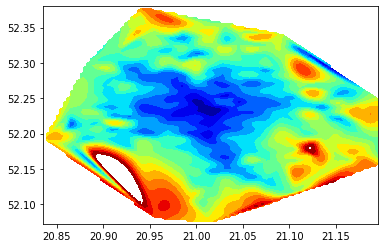

In [80]:
json_dict, df_contour=create_geojson(df_map.lon_mod,df_map.lat_mod,df_map.time_transit_8AM,5)

In [81]:
end_coors

(52.235176, 21.008393)

In [82]:

trace = go.Choroplethmapbox(
                            geojson=json_dict,
                            locations=df_contour.Id,
                            z=df_contour.value,
                            colorscale="jet",  
                            zauto=False,
                            zmax=60,
                            marker_line_width=0,

                            marker=dict(opacity=0.5),
                    
                           )
layout = dict(

   
    

    height = 800,
    # top, bottom, left and right margins
    margin = dict(t = 0, b = 0, l = 0, r = 0),
    font = dict(color = '#FFFFFF', size = 11),
    paper_bgcolor = '#000000',
    mapbox = dict(
        
        # here you need the token from Mapbox

        # where we want the map to be centered
        center = dict(
            lat = end_coors[0],
            lon = end_coors[1]
        ),
        # we want the map to be "parallel" to our screen, with no angle
        pitch = 0,
        # default level of zoom
        zoom = 11,
        # default map style
        style = "carto-positron"
    )

)

figure=dict(
    data=[trace],
    layout=layout,

  
    )


### Public transport commute time to center - Monday 8AM

In [83]:
iplot(figure)

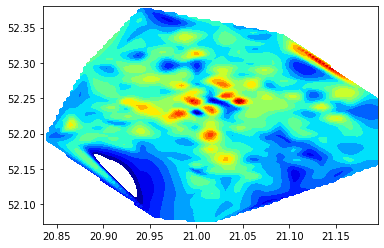

In [84]:
json_dict, df_contour=create_geojson(df_map.lon_mod,df_map.lat_mod,df_map.price_decrease_per_10min,500)

In [85]:

trace = go.Choroplethmapbox(
                            geojson=json_dict,
                            locations=df_contour.Id,
                            z=df_contour.value,
                            colorscale="jet",  
                           # zauto=False,
                           # zmax=60,
                            marker_line_width=0,

                            marker=dict(opacity=0.5),
                    
                           )
layout = dict(

   
    

    height = 800,
    # top, bottom, left and right margins
    margin = dict(t = 0, b = 0, l = 0, r = 0),
    font = dict(color = '#FFFFFF', size = 11),
    paper_bgcolor = '#000000',
    mapbox = dict(
        
        # here you need the token from Mapbox

        # where we want the map to be centered
        center = dict(
            lat = end_coors[0],
            lon = end_coors[1]
        ),
        # we want the map to be "parallel" to our screen, with no angle
        pitch = 0,
        # default level of zoom
        zoom = 11,
        # default map style
        style = "carto-positron"
    )

)

figure=dict(
    data=[trace],
    layout=layout,

  
    )


### How much does the price decrease from 20k per m2 (max) for every additional 10 mins of commute to center

In [86]:

iplot(figure)